# I. Perkenalan


Milestone 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

1. Mampu memahami konsep supervised learning
2. Mampu mempersiapkan data untuk digunakan dalam model supervised learning
3. Mampu mengimplementasikan supervised learning dengan data yang diberikan
4. Mampu melakukan evaluasi model
5. Mampu melakukan model tuning

# II. Import Libraries
> Cell pertama pada notebook akan diisi semua library yang digunakan dalam project, antara lain **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **missingno** dan **Scikit-Learn**.

In [578]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# III. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Dataset **bank-additional-full** terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y). 

In [579]:
df = pd.read_csv('bank-additional-full.csv', sep =';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## III.I. Data Characteristics

In [580]:
df.shape

(41188, 21)

Dataframe ini terbentuk dari:
- **41188** baris
- **21** kolom

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dari basic info ini dapat diketahui dataframe ini terdiri dari:
- 5 kolom dengan tipe float
- 5 kolom dengan tipe integer
- 11 kolom dengan tipe object

In [582]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Kebanyakan dari kolom pada dataframe memiliki distribusi yang normal, contohnya pada kolom `campaign` mean dan median kolom ini berdekatan.

## III.II. Data Cleaning

Pada proses data cleaning, dataset akan diperiksa apabila memiliki missing values. Berdasarkan konteks yang diberikan pada website dataset, value 999 pada kolom 'pdays' berarti klien tidak pernah dihubungi sebelumnya Maka dari itu, value 999 akan diubah menjadi nan dan akan dianggap missing value.

In [583]:
df["pdays"].replace({999: np.nan}, inplace=True)

In [584]:
df.isna().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

<AxesSubplot:>

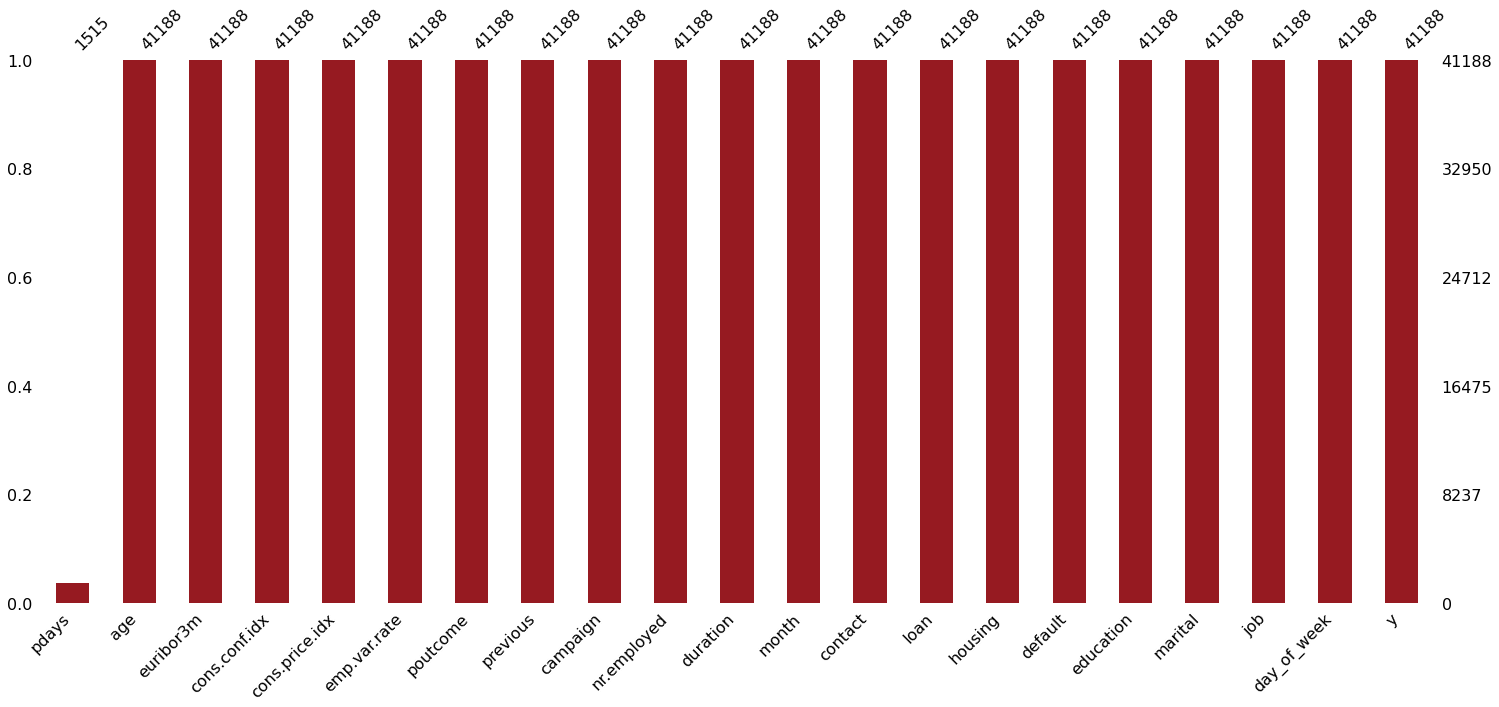

In [585]:
msno.bar(df, sort = 'ascending', color=(0.59, 0.1, 0.13))

Dari hasil pemeriksaan, terdapat 39673 missing values pada kolom pdays.

## III.III. Duplicated Data

In [586]:
df.duplicated().any()

True

Diketahui bahwa dataframe memiliki 1 data yang duplikat, maka data tersebut akan dihapus.

In [587]:
df = df.drop_duplicates()

In [588]:
df.duplicated().sum()

0

Setelah data duplikat dihapus, sekarang akan dilakukan eksplorasi data lebih lanjut.

# IV. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Agar `y` dapat diperiksa dalam heatmap, kolom ini akan diubah menjadi `y` dengan tipe integer.

In [589]:
df["y"].replace({"yes": 1, "no": 0}, inplace=True)

Berikut merupakan korelasi data pada kolom yang tergolong numerik:

In [590]:
numerik = [var for var in df.columns if df[var].dtype!='O']
numerik

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

<AxesSubplot:>

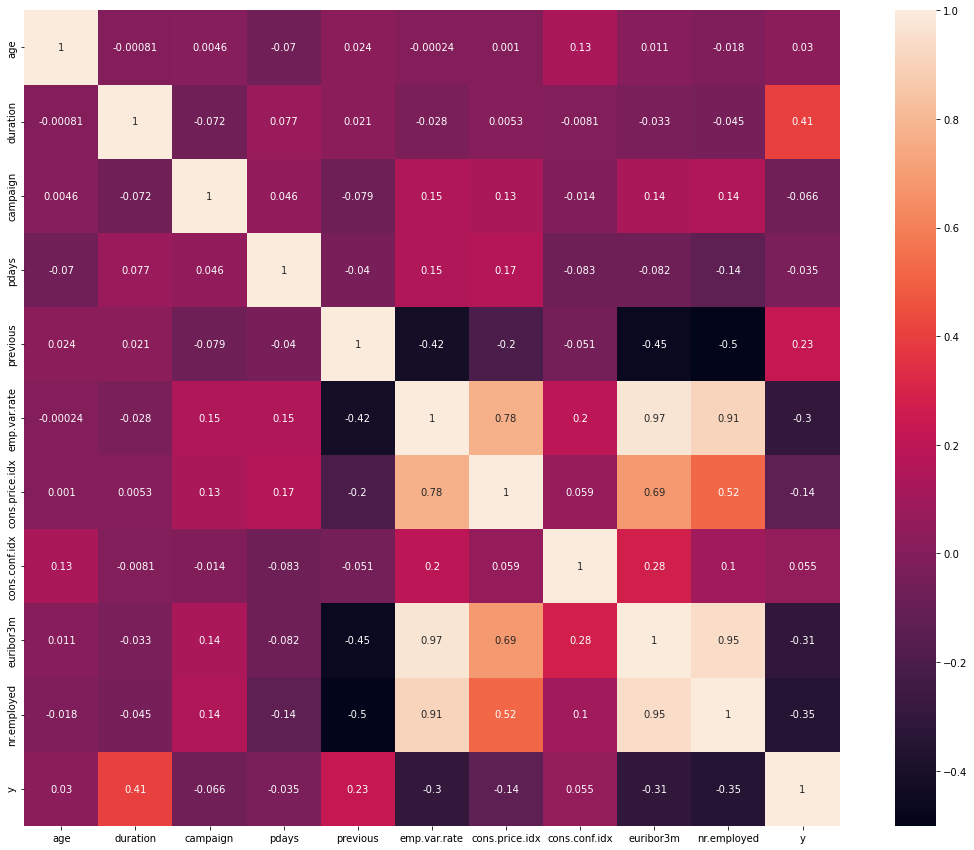

In [591]:
# Korelasi Data Numerik

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), square=True, annot=True)

Diketahui pada korelasi kolom katagorikal, bahwa `y` memiliki korelasi terbesar dengan `duration`, `pdays`, `emp.var.rate`, `euribor3m`, `nr.employed` maka kolom tersebut akan digunakan dalam Feature Selection dan akan diekplorasikan lebih lanjut.

Berikut merupakan korelasi data pada kolom yang tergolong kategorikal:

In [592]:
kategori = [var for var in df.columns if df[var].dtype=='O']
kategori

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [593]:
# Korelasi Data Katagorikal

cat_corr = pd.get_dummies(df[['job', 'marital', 'education', 'default', 'housing','loan','contact', 'month','day_of_week','poutcome','y']]).corr()
cat_corr.style.background_gradient(cmap='coolwarm')

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
y,1.000000,0.031301,-0.074431,-0.016651,-0.006510,-0.000426,0.092364,-0.004668,-0.032262,0.093962,-0.006069,0.014749,-0.000154,-0.010593,-0.043476,0.054209,0.005210,-0.010808,-0.023493,-0.045152,-0.007408,0.007246,0.001071,0.050267,0.021476,0.099356,-0.099305,-0.003042,-0.011145,-0.002275,0.011804,0.005136,-0.002275,-0.004478,0.144774,-0.144774,0.076188,-0.008778,0.079311,-0.032344,-0.009193,0.144027,-0.108278,-0.011779,0.137538,0.126079,-0.006989,-0.021241,0.013797,0.008123,0.006290,0.031794,-0.193522,0.316302
job_admin.,0.031301,1.000000,-0.313351,-0.111434,-0.094610,-0.160917,-0.121447,-0.110038,-0.190041,-0.085760,-0.257470,-0.092481,-0.052315,0.020062,-0.120672,0.117948,-0.007920,-0.181285,-0.104475,-0.162670,0.122216,-0.009499,-0.161404,0.327175,-0.052556,0.121330,-0.121241,-0.004968,-0.008559,-0.008572,0.011159,-0.015487,-0.008572,0.020091,0.059157,-0.059157,-0.004965,0.074509,0.003324,-0.000002,-0.017930,0.015062,-0.055126,0.008685,0.006651,0.010408,0.009787,-0.000668,-0.003936,-0.001835,-0.003114,0.002770,-0.015562,0.025073
job_blue-collar,-0.074431,-0.313351,1.000000,-0.103078,-0.087515,-0.148851,-0.112340,-0.101787,-0.175791,-0.079330,-0.238163,-0.085546,-0.048392,-0.056862,0.129248,-0.100162,-0.005255,0.265898,0.231031,0.372302,-0.173875,0.011009,-0.126495,-0.336621,0.018920,-0.176589,0.176708,-0.004596,0.014014,0.006658,-0.016007,0.003135,0.006658,-0.006169,-0.094617,0.094617,-0.006241,-0.131318,-0.025347,0.027311,0.032955,-0.036978,0.136199,-0.062054,-0.048985,-0.054325,0.003315,-0.009742,-0.007097,-0.006748,0.020626,-0.013289,0.043887,-0.061426
job_entrepreneur,-0.016651,-0.111434,-0.103078,1.000000,-0.031122,-0.052934,-0.039950,-0.036197,-0.062515,-0.028211,-0.084696,-0.030422,-0.017209,0.006652,0.051055,-0.060248,0.000511,-0.004646,-0.005743,-0.001395,-0.031932,0.008577,-0.019843,0.051845,-0.002735,0.000991,-0.000957,-0.001634,-0.004553,0.000853,0.004276,0.004815,0.000853,-0.005473,-0.018883,0.018883,0.008585,-0.053174,-0.010775,0.006763,0.011352,-0.019896,-0.000782,0.054465,-0.010408,-0.009179,-0.001921,0.006823,0.005580,-0.007257,-0.003508,0.001576,0.007620,-0.017249
job_housemaid,-0.006510,-0.094610,-0.087515,-0.031122,1.000000,-0.044942,-0.033919,-0.030732,-0.053076,-0.023952,-0.071908,-0.025829,-0.014611,0.020570,0.042496,-0.060975,0.003275,0.186175,0.012057,-0.026699,-0.025785,0.003937,-0.034923,-0.058533,-0.001938,-0.036835,0.036869,-0.001388,0.003633,0.003518,-0.004700,0.001341,0.003518,-0.002925,-0.010445,0.010445,-0.012998,0.021049,0.012286,0.022019,-0.000412,-0.010800,-0.018986,-0.009499,0.000636,-0.003509,-0.007608,0.003361,-0.008992,0.011519,0.001774,-0.017870,0.014648,0.002267
job_management,-0.000426,-0.160917,-0.148851,-0.052934,-0.044942,1.000000,-0.057691,-0.052271,-0.090275,-0.040739,-0.122306,-0.043931,-0.024851,0.001068,0.061767,-0.067366,-0.005757,-0.061562,-0.032047,-0.070337,-0.084682,-0.005782,-0.080324,0.248540,0.000070,0.035506,-0.035461,-0.002360,0.007810,0.000431,-0.007915,0.000990,0.000431,-0.001235,0.009052,-0.009052,0.003157,-0.021601,-0.001317,-0.027450,-0.007230,0.002668,-0.013755,0.085214,0.000061,0.004470,-0.005963,0.008299,-0.005807,0.001617,0.001754,0.009028,-0.007311,-0.001317
job_retired,0.09236

Diketahui pada korelasi kolom katagorikal, bahwa `y` memiliki korelasi terbesar dengan `poutcome`, maka kolom tersebut akan digunakan dalam Feature Selection dan akan diekplorasikan lebih lanjut.

In [594]:
df["y"].replace({1:"yes", 0:"no"}, inplace=True)

### Duration
> Durasi kontak terakhir, dalam detik (numerik).

Text(0, 0.5, 'Count')

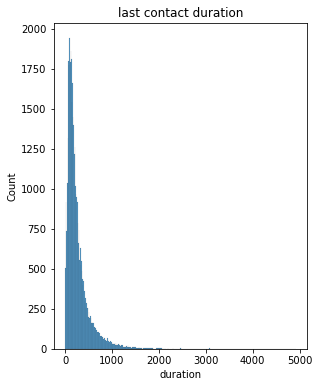

In [595]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(x='duration', data=df)
plt.title('last contact duration')
plt.xlabel('duration')
plt.ylabel('Count')

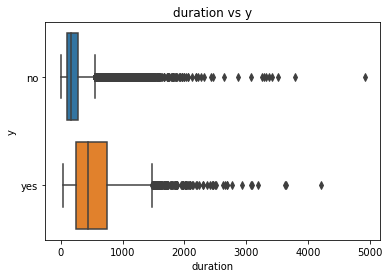

In [596]:
sns.boxplot(x='duration', y='y', data=df)
plt.title('duration vs y')
plt.xlabel('duration')
plt.ylabel('y')
plt.show()

Kolom duration memiliki pengaruh terhadap kolom target `y`. Dari bar chart ini dapat diketahui bahwa klien yang sudah berlangganan deposito berjangka memiliki durasi kontak terakhir yang lebih panjang dari klien yang belum berlangganan deposito berjangka.

### Job
> Jenis pekerjaan

In [597]:
df.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Text(0, 0.5, 'Count')

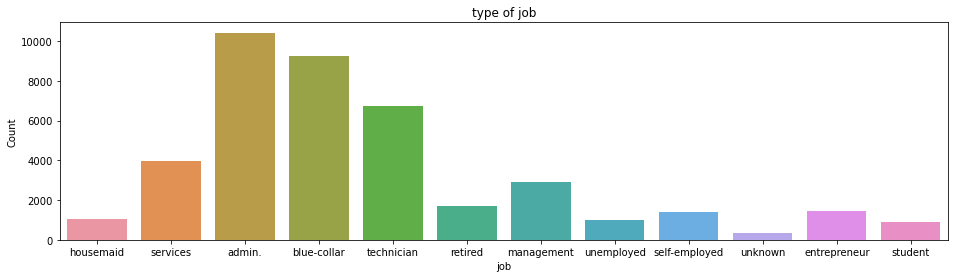

In [598]:
plt.figure(figsize=(35,4))
plt.subplot(1,2,1)
sns.countplot(x='job', data=df)
plt.title('type of job')
plt.xlabel('job')
plt.ylabel('Count')

In [599]:
df.groupby(['job', 'y']).y.count()

job            y  
admin.         no     9068
               yes    1351
blue-collar    no     8615
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1284
               yes     434
self-employed  no     1272
               yes     149
services       no     3644
               yes     323
student        no      600
               yes     275
technician     no     6009
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: y, dtype: int64

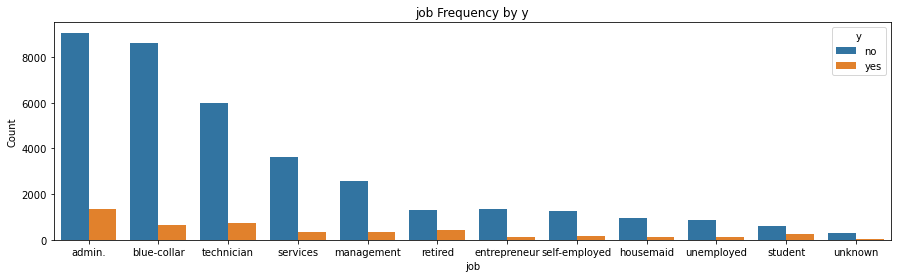

In [600]:
plt.figure(figsize=(15,4))
sns.countplot(x='job', data=df, order=df.job.value_counts().sort_values(ascending=False).index, hue='y')
plt.title('job Frequency by y')
plt.xlabel('job')
plt.ylabel('Count')
plt.show()

Diketahui mayoritas dari klien yang berlangganan maupun yang belum berlangganan memiliki pekerjaan sebagai admin, sedangkan tipe pekerjaan yang memiliki total klien yang berlangganan maupun yang belum berlangganan terkecil yaitu tidak diketahui atau disebut dengan 'unknown' pada kolom job.

### Contact
>Jenis komunikasi kontak

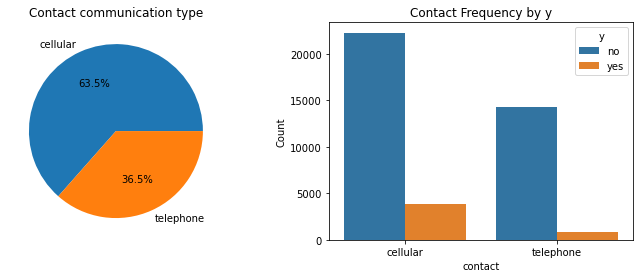

In [601]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.pie(df.contact.value_counts(), labels=df.contact.value_counts().index, autopct='%1.1f%%')
plt.title('Contact communication type')
plt.subplot(1, 2, 2)
sns.countplot(x='contact', data=df, order=df.contact.value_counts().sort_values(ascending=False).index, hue='y')
plt.title('Contact Frequency by y')
plt.xlabel('contact')
plt.ylabel('Count')
plt.show()
plt.show()

In [602]:
df.groupby(['contact', 'y']).y.count()

contact    y  
cellular   no     22283
           yes     3852
telephone  no     14254
           yes      787
Name: y, dtype: int64

Diketahui mayoritas klien yang berlangganan maupun yang belum berlangganan menggunakan seluler mereka sebagai jenis komunikasi kontak.

###  Housing & Loan
>Pinjaman

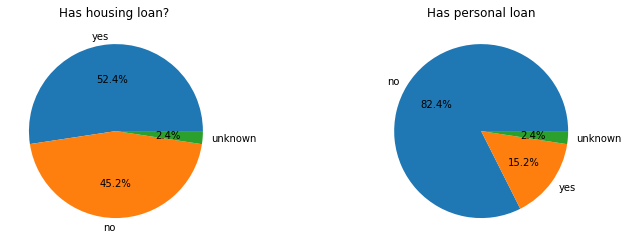

In [603]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.pie(df.housing.value_counts(), labels=df.housing.value_counts().index, autopct='%1.1f%%')
plt.title('Has housing loan? ')
plt.subplot(1, 2, 2)
plt.pie(df.loan.value_counts(), labels=df.loan.value_counts().index, autopct='%1.1f%%')
plt.title('Has personal loan')
plt.show()

In [604]:
df.groupby(['loan', 'housing']).size()

loan     housing
no       no         16058
         yes        17880
unknown  unknown      990
yes      no          2557
         yes         3691
dtype: int64

Diketahui 52.4% klien memiliki pinjaman perumahan, 15.2% klien memiliki pinjaman pribadi.

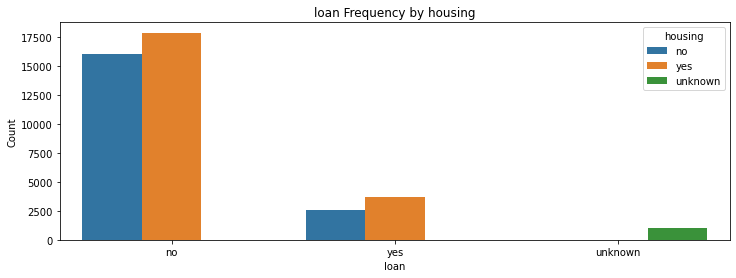

In [605]:
plt.figure(figsize=(12,4))
sns.countplot(x='loan', data=df, order=df.loan.value_counts().sort_values(ascending=False).index, hue='housing')
plt.title('loan Frequency by housing')
plt.xlabel('loan')
plt.ylabel('Count')
plt.show()

Diketahui klien yang tidak diketahui memiliki pinjaman pribadi, juga tidak diketahui kalau memiliki pinjaman perumahan, dengan kata lain total 990 klien memiliki status 'unknown' pada kolom housing & loan. Sebagian besar klien memiliki dan tidak memiliki pinjaman perumahan tidak memiliki pinjaman pribadi.

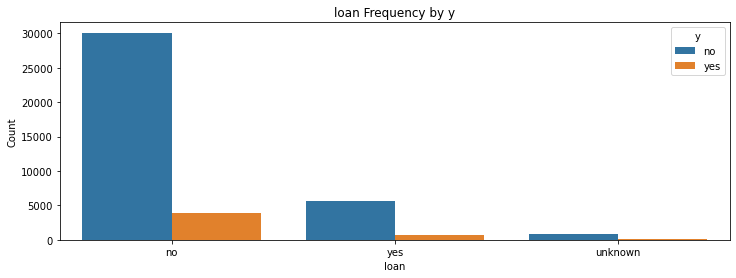

In [606]:
plt.figure(figsize=(12,4))
sns.countplot(x='loan', data=df, order=df.loan.value_counts().sort_values(ascending=False).index, hue='y')
plt.title('loan Frequency by y')
plt.xlabel('loan')
plt.ylabel('Count')
plt.show()

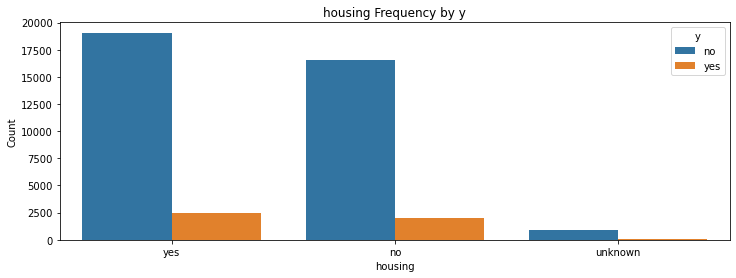

In [607]:
plt.figure(figsize=(12,4))
sns.countplot(x='housing', data=df, order=df.housing.value_counts().sort_values(ascending=False).index, hue='y')
plt.title('housing Frequency by y')
plt.xlabel('housing')
plt.ylabel('Count')
plt.show()

Diketahui mayoritas klien yang memiliki pinjaman perumahan memiliki langganan deposito berjangka, begitu pula dengan klien yang tidak berlangganan. Dapat disimpulkan bahwa pinjaman pribadi maupun perumahan tidak mempengaruhi status langganan deposito berjangka seorang klien.

### Poutcome
> Hasil dari kampanye pemasaran sebelumnya

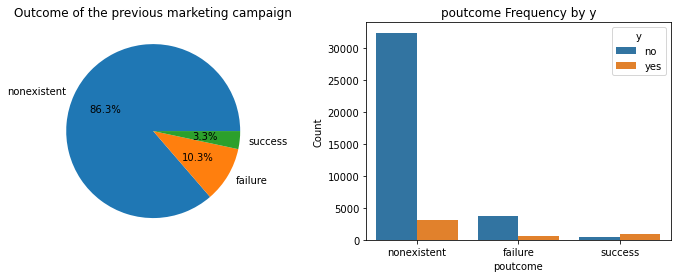

In [608]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.pie(df.poutcome.value_counts(), labels=df.poutcome.value_counts().index, autopct='%1.1f%%')
plt.title('Outcome of the previous marketing campaign')
plt.subplot(1, 2, 2)
sns.countplot(x='poutcome', data=df, order=df.poutcome.value_counts().sort_values(ascending=False).index, hue='y')
plt.title('poutcome Frequency by y')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.show()

In [609]:
df.groupby(['poutcome', 'y']).y.count()

poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32411
             yes     3140
success      no       479
             yes      894
Name: y, dtype: int64

Diketahui outcome yang paling banyak muncul bagi klien yang berlangganan maupun yang tidak berlangganan deposito berjangka yaitu outcome 'nonexistent'. Namun outcome sukses lebih banyak memiliki jumlah klien yang berlangganan dibandingkan dengan yang tidak berlangganan.

### y
> Apakah klien sudah berlangganan deposito berjangka?

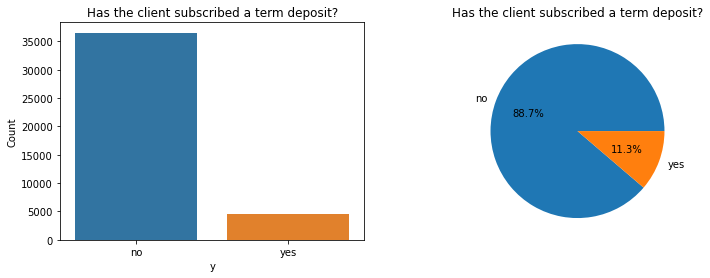

In [610]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='y', data=df)
plt.title('Has the client subscribed a term deposit?')
plt.xlabel('y')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.pie(df.y.value_counts(), labels=df.y.value_counts().index, autopct='%1.1f%%')
plt.title('Has the client subscribed a term deposit?')
plt.show()

Diketahui mayoritas klien belum berlangganan deposito berjangka dan klien yang berlangganan deposito berjangka hanya mencakup 11.3% dari total klien.

# V. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## V.I. Get Data Inference

Mengambil 10 sampel pada dataframe untuk melakukan inference.

In [611]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state=20)
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40426,24,admin.,single,university.degree,no,no,no,cellular,aug,fri,...,1,NaN,2,failure,-1.7,94.027,-38.3,0.905,4991.6,yes
29954,32,services,married,high.school,no,yes,yes,cellular,apr,mon,...,6,NaN,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
11877,45,unknown,married,unknown,no,no,no,telephone,jun,fri,...,4,NaN,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
6695,53,technician,married,professional.course,unknown,no,no,telephone,may,wed,...,2,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
26135,53,management,married,basic.4y,no,yes,no,cellular,nov,wed,...,7,NaN,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
35064,39,technician,married,unknown,no,yes,yes,cellular,may,fri,...,1,NaN,1,failure,-1.8,92.893,-46.2,1.250,5099.1,no
8914,54,technician,single,university.degree,unknown,no,no,telephone,jun,thu,...,3,NaN,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
15767,39,admin.,married,university.degree,no,yes,no,cellular,jul,mon,...,4,NaN,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
10467,55,management,married,university.degree,no,yes,no,telephone,jun,mon,...,5,NaN,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
5694,35,admin.,married,university.degree,no,yes,yes,telephone,may,mon,...,3,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [612]:
# Remove Inference-Set from Dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [613]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

# Display data_inf
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,24,admin.,single,university.degree,no,no,no,cellular,aug,fri,...,1,NaN,2,failure,-1.7,94.027,-38.3,0.905,4991.6,yes
1,32,services,married,high.school,no,yes,yes,cellular,apr,mon,...,6,NaN,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
2,45,unknown,married,unknown,no,no,no,telephone,jun,fri,...,4,NaN,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
3,53,technician,married,professional.course,unknown,no,no,telephone,may,wed,...,2,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,53,management,married,basic.4y,no,yes,no,cellular,nov,wed,...,7,NaN,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
5,39,technician,married,unknown,no,yes,yes,cellular,may,fri,...,1,NaN,1,failure,-1.8,92.893,-46.2,1.250,5099.1,no
6,54,technician,single,university.degree,unknown,no,no,telephone,jun,thu,...,3,NaN,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
7,39,admin.,married,university.degree,no,yes,no,cellular,jul,mon,...,4,NaN,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
8,55,management,married,university.degree,no,yes,no,telephone,jun,mon,...,5,NaN,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
9,35,admin.,married,university.degree,no,yes,yes,telephone,may,mon,...,3,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## V.II. Split Dataset

Membuat training set dan test set dengan perbandingan **8:2**, dimana:
- **80%** data menjadi **training set**
- **20%** data menjadi **test set**

In [614]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=17)

Isi dari training dataframe.

In [615]:
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
34915,43,entrepreneur,married,professional.course,no,yes,no,cellular,may,fri,...,1,NaN,1,failure,-1.8,92.893,-46.2,1.250,5099.1,yes
17409,57,self-employed,married,university.degree,unknown,unknown,unknown,telephone,jul,mon,...,1,NaN,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
10700,33,admin.,married,university.degree,no,no,yes,telephone,jun,tue,...,2,NaN,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
11277,31,technician,single,university.degree,no,no,no,telephone,jun,thu,...,1,NaN,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
24388,41,blue-collar,married,high.school,unknown,yes,no,cellular,nov,mon,...,1,NaN,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31053,52,management,divorced,university.degree,no,no,no,cellular,may,wed,...,1,NaN,1,failure,-1.8,92.893,-46.2,1.334,5099.1,yes
25639,29,blue-collar,married,basic.4y,no,no,no,cellular,nov,wed,...,2,NaN,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
33184,41,housemaid,married,basic.4y,no,yes,no,cellular,may,tue,...,1,NaN,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no
34969,35,services,single,high.school,no,unknown,unknown,cellular,may,fri,...,2,NaN,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


`df_train` ini memiliki **32940 baris** dengan **21 kolom**.

Isi dari testing dataframe.

In [616]:
df_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22873,32,housemaid,married,basic.4y,no,yes,no,cellular,aug,mon,...,9,NaN,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
32755,39,blue-collar,married,professional.course,no,no,no,cellular,may,mon,...,1,NaN,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
1269,31,admin.,married,high.school,no,no,no,telephone,may,thu,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
15544,41,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,4,NaN,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
25819,36,management,married,university.degree,no,yes,no,cellular,nov,wed,...,2,NaN,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19982,31,unemployed,married,university.degree,no,yes,no,cellular,aug,fri,...,4,NaN,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
20465,41,technician,married,professional.course,no,no,no,cellular,aug,tue,...,1,NaN,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
7944,34,blue-collar,married,high.school,no,yes,no,telephone,jun,mon,...,3,NaN,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
10885,23,blue-collar,married,professional.course,unknown,no,no,telephone,jun,wed,...,1,NaN,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


`df_test` ini memiliki **823  baris** dengan **21 kolom**.

### V.III. Handling Missing Values

Karena terdapat missing value pada kolom `pdays`, maka pada bagian ini akan dilakukan handling terhadap baris yang memilki missing value pada kolom `pdays`.

In [617]:
df_train.isna().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             31722
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [618]:
df_test.isna().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays             7939
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [619]:
df_inf.isna().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays             10
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
y                  0
dtype: int64

Pada `df_train`, `df_test`, dan `df_inf` terdapat **31722 baris**, **7939 baris**, dan **10 baris** data yang memiliki missing value pada kolom `pdays`.

In [620]:
print(f'Skewness pdays: {df.pdays.skew()}')

Skewness pdays: 1.4585638453665568


Diketahui dari skewness pada kolom `pdays`, maka missing value akan diisi dengan median dari kolom `pdays`.

In [621]:
df_train['pdays'] = df_train['pdays'].fillna(df_train['pdays'].median())
df_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [622]:
df_train.shape

(32940, 21)

In [623]:
df_test['pdays'] = df_test['pdays'].fillna(df_train['pdays'].median())
df_test.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [624]:
df_test.shape

(8236, 21)

In [625]:
df_inf['pdays'] = df_inf['pdays'].fillna(df_train['pdays'].median())
df_inf.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [626]:
df_inf.shape

(10, 21)

Setelah dilakukan pengiisian baris dengan missing value, sekarang `df_train` memiliki **32940 baris**, `df_test` memiliki **8236 baris**, dan `df_inf` memiliki **10 baris**.

### V.IV. Handling Outlier

Pada bagian ini akan dilakukan diagnostic pada kolom-kolom fitur yang bersifat numerik.

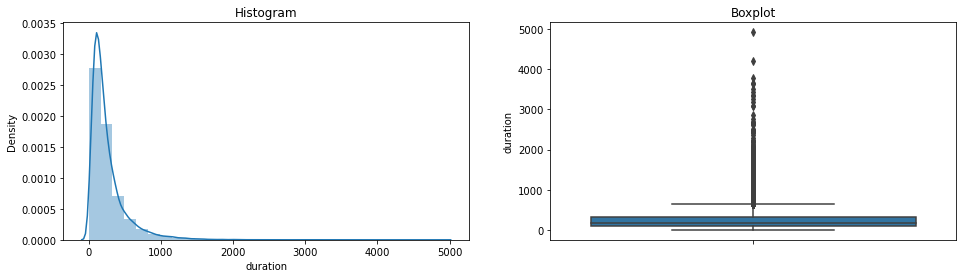

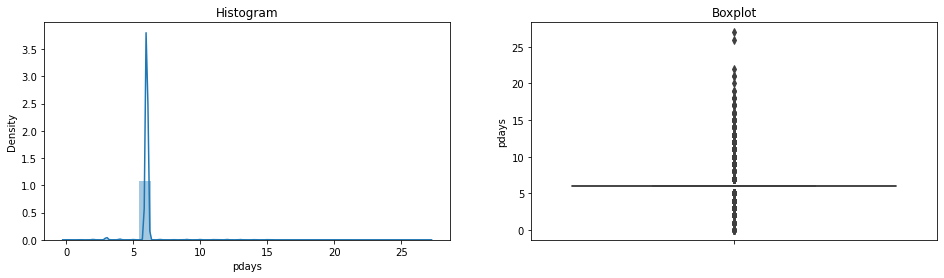

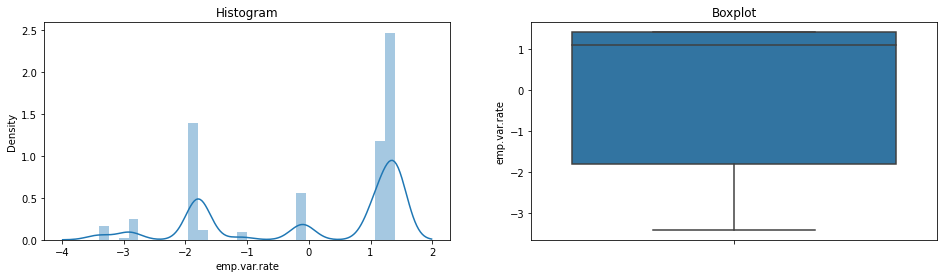

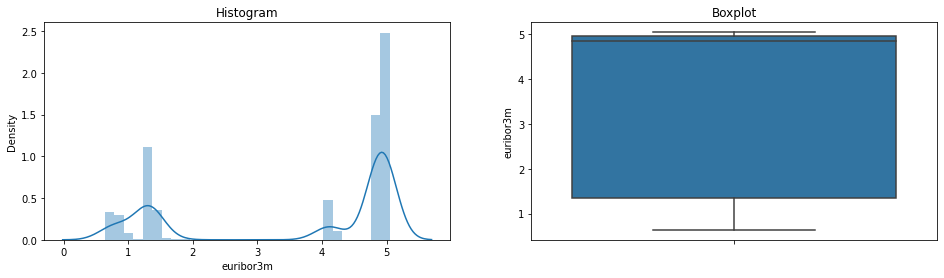

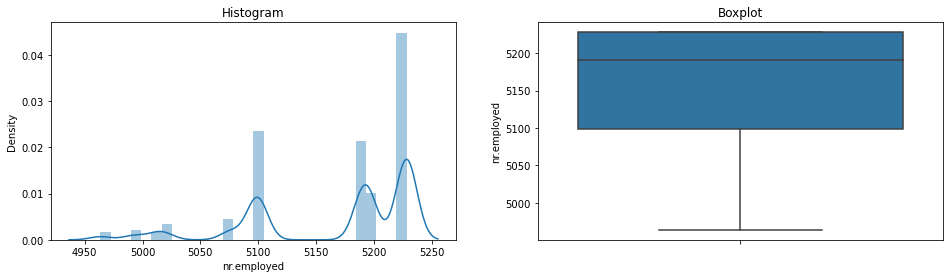

In [627]:
def diagnostic_plots(df_train, variables):
    # Define Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df_train[variables], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variables])
    plt.title('Boxplot')

    plt.show

# Cek Outlier pada kolom 

diagnostic_plots(df_train, 'duration')
diagnostic_plots(df_train, 'pdays')
diagnostic_plots(df_train, 'emp.var.rate')
diagnostic_plots(df_train, 'euribor3m')
diagnostic_plots(df_train, 'nr.employed')

Diketahui kolom duration memiliki outliers, maka akan dilakukan handling terhadap baris yang memiliki outliers pada kolom `duration`.

Karena distribusi dari kolom tersebut skewed, maka akan dilakukan outlier handling menggunakan **IQR**.

In [628]:
def find_skewed_boundaries(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)

    return lower_bound, upper_bound

In [629]:
print(find_skewed_boundaries(df_train, 'duration'))

(-225.0, 647.0)


In [630]:
d_lower_boundary, d_upper_boundary = find_skewed_boundaries(df_train, 'duration')

In [631]:
print(f'Number of outliers (duration): {len(df_train[(df_train.duration < d_lower_boundary) | (df_train.duration > d_upper_boundary)])}')

Number of outliers (duration): 2351


In [632]:
df_train = df_train[(df_train.duration > d_lower_boundary) & (df_train.duration < d_upper_boundary)]

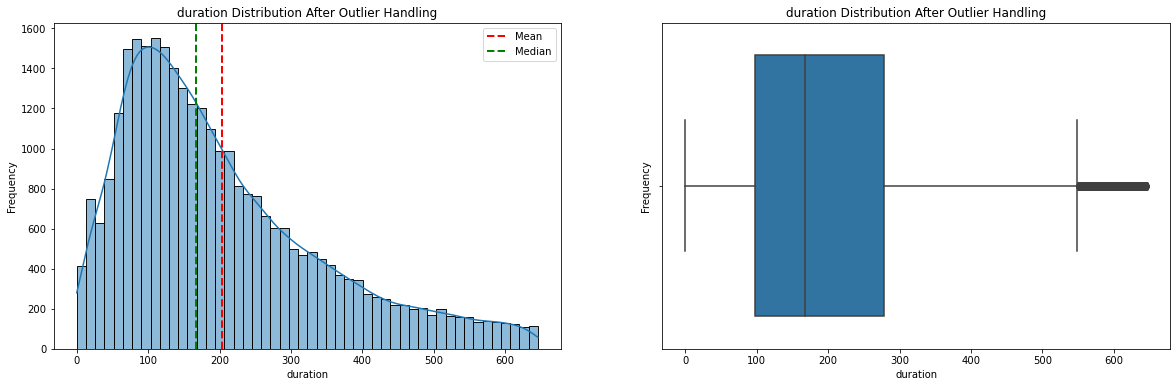

In [633]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='duration', data=df_train, bins=50, kde=True)
plt.axvline(df_train.duration.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.duration.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('duration Distribution After Outlier Handling')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='duration', data=df_train)
plt.title('duration Distribution After Outlier Handling')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()

In [634]:
df_train.shape

(30581, 21)

Setelah dilakukan penghapusan outlier jumlah baris dari dataframe `df_train` menjadi **30581 baris**.

## V.V. Feature Selection
Diketahui bahwa beberapa parameter yang paling memengaruhi kolom `y` berdasarkan korelasi data adalah `duration`, `pdays`, `emp.var.rate`, `euribor3m`, `nr.employed`, dan `poutcome`

In [635]:
X_train = df_train[['duration', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed', 'poutcome']] # Features
y_train = df_train.y # Target

X_test = df_test[['duration', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed', 'poutcome']] # Features
y_test = df_test.y # Target

## V.VI. Splitting Columns (Numerical Columns and Categorical Columns)

Selanjutnya akan memisahkan kolom yang bertipe numeric dengan categorical pada `X_train` dan `X_test` untuk memudahkan proses **Scaling** dan **Encoding**.

In [636]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

Number of numerical columns: 5
Numerical columns: Index(['duration', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed'], dtype='object')
Number of categorical columns: 1
Categorical columns: Index(['poutcome'], dtype='object')


In [637]:
# Feature Scaling

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[ 7.58830460e-01,  2.66936635e-03, -1.19620123e+00,
        -1.36829713e+00, -9.42936426e-01],
       [ 3.11167638e+00,  2.66936635e-03,  8.38940120e-01,
         7.72620017e-01,  8.45873054e-01],
       [ 5.18599946e-01,  2.66936635e-03,  8.38940120e-01,
         7.72043262e-01,  8.45873054e-01],
       ...,
       [-5.34174956e-01,  2.66936635e-03, -1.19620123e+00,
        -1.34465015e+00, -9.42936426e-01],
       [-5.97765386e-01,  2.66936635e-03, -1.19620123e+00,
        -1.36829713e+00, -9.42936426e-01],
       [ 1.50778442e+00,  2.66936635e-03,  8.38940120e-01,
         7.72620017e-01,  8.45873054e-01]])

Mengubah `X_train_num_scaled` dan `X_test_num_scaled` menjadi **dataframe**, sekaligus menampilkan `X_train_num_scaled` setelah dilakukan normalisasi (**Scaling**).

In [638]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols)

X_train_num_scaled.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,0.758830,0.002669,-1.196201,-1.368297,-0.942936
1,3.111676,0.002669,0.838940,0.772620,0.845873
2,0.518600,0.002669,0.838940,0.772043,0.845873
3,-0.922783,0.002669,0.838940,0.772043,0.845873
4,-0.583634,0.002669,-0.115032,0.327941,0.397977


`X_test_num_scaled` setelah dilakukan normalisasi (**Scaling**).

In [639]:
X_test_num_scaled.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,-1.360851,0.002669,0.838940,0.774350,0.845873
1,-0.385797,0.002669,-1.196201,-1.340036,-0.942936
2,4.100861,0.002669,0.648146,0.710907,0.331417
3,1.670293,0.002669,0.838940,0.769736,0.845873
4,3.069283,0.002669,-0.115032,0.286992,0.397977


In [640]:
# Feature Encoding

encoder = OneHotEncoder()

X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

<30581x3 sparse matrix of type '<class 'numpy.float64'>'
	with 30581 stored elements in Compressed Sparse Row format>

Mengubah `X_train_cat_encoded` dan `X_test_cat_encoded` menjadi **dataframe**, sekaligus menampilkan `X_train_cat_encoded` setelah dilakukan encoding (**Encoding**).

In [641]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))

X_train_cat_encoded.head()

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


`X_test_cat_encoded` setelah dilakukan **encoding**.

In [642]:
X_test_cat_encoded.head()

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


## V.VII. Concatenate between Numerical Columns and Categorical Columns

Setelah feature numerik dan kategori dipisah untuk dilakukan **Scaling** dan **Encoding**, pada bagian ini akan menggabungkan kembali feature menjadi `X_train` dan `X_test`.

In [643]:
X_train = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.758830,0.002669,-1.196201,-1.368297,-0.942936,1.0,0.0,0.0
1,3.111676,0.002669,0.838940,0.772620,0.845873,0.0,1.0,0.0
2,0.518600,0.002669,0.838940,0.772043,0.845873,0.0,1.0,0.0
3,-0.922783,0.002669,0.838940,0.772043,0.845873,0.0,1.0,0.0
4,-0.583634,0.002669,-0.115032,0.327941,0.397977,1.0,0.0,0.0


In [644]:
X_test.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-1.360851,0.002669,0.838940,0.774350,0.845873,0.0,1.0,0.0
1,-0.385797,0.002669,-1.196201,-1.340036,-0.942936,1.0,0.0,0.0
2,4.100861,0.002669,0.648146,0.710907,0.331417,0.0,1.0,0.0
3,1.670293,0.002669,0.838940,0.769736,0.845873,0.0,1.0,0.0
4,3.069283,0.002669,-0.115032,0.286992,0.397977,0.0,1.0,0.0


# VI. Model Definition
> Akan dibuat **7 model**, dimana:
- `model_logreg` untuk **Logistic Regression**.
- `model_svc` untuk **SVC**.
- `model_knn` untuk **K-Nearest Neighbors**.
- `model_gnb` untuk **Gaussian Naive Bayes**.
- `model_tree` untuk **Decision Tree**.
- `model_rf` untuk **Random Forest**.
- `model_xgb` untuk **XGBoost**.


In [645]:
model_logreg = LogisticRegression()
model_svc = SVC()
model_knn = KNeighborsClassifier(n_neighbors=5)
model_gnb = GaussianNB()
model_tree = DecisionTreeClassifier(random_state=4)
model_rf = RandomForestClassifier(random_state=4)
model_xgb = XGBClassifier()

# VII. Model Training
> Seteah model dibuat, selanjutnya setiap model akan dilatih menggunakan data trainnya masing-masing.

In [646]:
model_logreg.fit(X_train, y_train)

LogisticRegression()

In [647]:
model_svc.fit(X_train, y_train)

SVC()

In [648]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

In [649]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [650]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [651]:
model_gnb.fit(X_train, y_train)

GaussianNB()

In [652]:
model_xgb.fit(X_train, y_train)

[23:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# VIII. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

### Logistic Regression

In [653]:
y_pred_train_log = model_logreg.predict(X_train)
y_pred_test_log = model_logreg.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_log)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_log)}')

Accuracy on training set: 0.9345345148948694
Accuracy on test set: 0.9069936862554638


----Train Set----
              precision    recall  f1-score   support

          no       0.95      0.98      0.96     28066
         yes       0.68      0.39      0.50      2515

    accuracy                           0.93     30581
   macro avg       0.81      0.69      0.73     30581
weighted avg       0.93      0.93      0.93     30581

----Test Set----
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7326
         yes       0.59      0.50      0.54       910

    accuracy                           0.91      8236
   macro avg       0.77      0.73      0.75      8236
weighted avg       0.90      0.91      0.90      8236



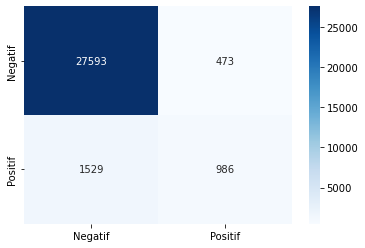

In [654]:
print('----Train Set----')
print(classification_report(y_train, model_logreg.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_logreg.predict(X_test)))
cf_matrix = confusion_matrix(y_train, model_logreg.predict(X_train))
# figure size

#plotting confusion matrix
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

### SVC

In [655]:
y_pred_train_svc = model_svc.predict(X_train)
y_pred_test_svc = model_svc.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_svc)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_svc)}')

Accuracy on training set: 0.9364311173604526
Accuracy on test set: 0.9066294317629917


In [656]:
print('----Train Set----')
print(classification_report(y_train, model_svc.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_svc.predict(X_test)))

----Train Set----
              precision    recall  f1-score   support

          no       0.95      0.99      0.97     28066
         yes       0.72      0.38      0.49      2515

    accuracy                           0.94     30581
   macro avg       0.83      0.68      0.73     30581
weighted avg       0.93      0.94      0.93     30581

----Test Set----
              precision    recall  f1-score   support

          no       0.92      0.99      0.95      7326
         yes       0.71      0.27      0.39       910

    accuracy                           0.91      8236
   macro avg       0.81      0.63      0.67      8236
weighted avg       0.89      0.91      0.89      8236



### K-Nearest Neighbors

In [657]:
y_pred_train_knn = model_knn.predict(X_train)
y_pred_test_knn = model_knn.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_knn)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_knn)}')

Accuracy on training set: 0.9492168339818842
Accuracy on test set: 0.9057795046138902


In [658]:
print('----Train Set----')
print(classification_report(y_train, model_knn.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_knn.predict(X_test)))

----Train Set----
              precision    recall  f1-score   support

          no       0.96      0.98      0.97     28066
         yes       0.75      0.57      0.65      2515

    accuracy                           0.95     30581
   macro avg       0.86      0.78      0.81     30581
weighted avg       0.94      0.95      0.95     30581

----Test Set----
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7326
         yes       0.62      0.38      0.47       910

    accuracy                           0.91      8236
   macro avg       0.77      0.68      0.71      8236
weighted avg       0.89      0.91      0.90      8236



### Gaussian Naive Bayes

In [659]:
y_pred_train_gnb = model_gnb.predict(X_train)
y_pred_test_gnb = model_gnb.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_gnb)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_gnb)}')

Accuracy on training set: 0.8676629279618063
Accuracy on test set: 0.8415492957746479


In [660]:
print('----Train Set----')
print(classification_report(y_train, model_gnb.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_gnb.predict(X_test)))

----Train Set----
              precision    recall  f1-score   support

          no       0.95      0.90      0.93     28066
         yes       0.32      0.53      0.39      2515

    accuracy                           0.87     30581
   macro avg       0.64      0.71      0.66     30581
weighted avg       0.90      0.87      0.88     30581

----Test Set----
              precision    recall  f1-score   support

          no       0.93      0.88      0.91      7326
         yes       0.35      0.50      0.41       910

    accuracy                           0.84      8236
   macro avg       0.64      0.69      0.66      8236
weighted avg       0.87      0.84      0.85      8236



### Decision Tree

In [661]:
y_pred_train_tree = model_tree.predict(X_train)
y_pred_test_tree = model_tree.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_tree)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_tree)}')

Accuracy on training set: 0.9936888917955593
Accuracy on test set: 0.8895094706168043


In [662]:
print('----Train Set----')
print(classification_report(y_train, model_tree.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_tree.predict(X_test)))

----Train Set----
              precision    recall  f1-score   support

          no       0.99      1.00      1.00     28066
         yes       1.00      0.93      0.96      2515

    accuracy                           0.99     30581
   macro avg       1.00      0.96      0.98     30581
weighted avg       0.99      0.99      0.99     30581

----Test Set----
              precision    recall  f1-score   support

          no       0.93      0.95      0.94      7326
         yes       0.50      0.41      0.45       910

    accuracy                           0.89      8236
   macro avg       0.71      0.68      0.69      8236
weighted avg       0.88      0.89      0.88      8236



### Random Forest

In [663]:
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_rf)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_rf)}')

Accuracy on training set: 0.9936561917530493
Accuracy on test set: 0.902622632345799


In [664]:
print('----Train Set----')
print(classification_report(y_train, model_rf.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_rf.predict(X_test)))

----Train Set----
              precision    recall  f1-score   support

          no       0.99      1.00      1.00     28066
         yes       0.98      0.94      0.96      2515

    accuracy                           0.99     30581
   macro avg       0.99      0.97      0.98     30581
weighted avg       0.99      0.99      0.99     30581

----Test Set----
              precision    recall  f1-score   support

          no       0.93      0.96      0.95      7326
         yes       0.58      0.42      0.49       910

    accuracy                           0.90      8236
   macro avg       0.76      0.69      0.72      8236
weighted avg       0.89      0.90      0.90      8236



### XGBoost

In [665]:
y_pred_train_xgb = model_xgb.predict(X_train)
y_pred_test_xgb = model_xgb.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_xgb)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_xgb)}')

Accuracy on training set: 0.9569994440992773
Accuracy on test set: 0.9139145216124333


In [666]:
print('----Train Set----')
print(classification_report(y_train, model_xgb.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_xgb.predict(X_test)))

----Train Set----
              precision    recall  f1-score   support

          no       0.97      0.99      0.98     28066
         yes       0.82      0.61      0.70      2515

    accuracy                           0.96     30581
   macro avg       0.89      0.80      0.84     30581
weighted avg       0.95      0.96      0.95     30581

----Test Set----
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7326
         yes       0.67      0.44      0.53       910

    accuracy                           0.91      8236
   macro avg       0.80      0.70      0.74      8236
weighted avg       0.90      0.91      0.91      8236



## VIII.I. Hyperparameter Tuning with GridSearchCV

> Pada bagian ini, dilakukan tuning model dengan menggunakan **GridSearchCV**.

In [667]:
# Parameter list

parameters_logreg = { 'C': [100, 200],
                    'penalty': ['l1', 'l2'],
                    'class_weight': ['balanced', None],
                    'solver': ['liblinear', 'newton-cg', 'lbfgs']
                    }

parameters_svc = {'kernel': ['rbf', 'linear'], 
                'C': [0.1, 1, 10], 
                'gamma': [1, 0.1, 'scale']}

parameters_knn = {'n_neighbors': [1, 5, 10],
                'weights': ['uniform', 'distance']}

parameters_gnb = {'var_smoothing': [1e-09, 1e-08, 1e-07]}

parameters_tree = {'criterion':['gini','entropy'],
              'max_depth':np.arange(2,12, 2),
              'min_samples_split':np.arange(2,12, 2),
              'min_samples_leaf':np.arange(2,12, 2)
              }

parameters_rf = {'criterion':['gini','entropy'],
              'max_depth':np.arange(2,12, 2),
              'min_samples_split':np.arange(2,12, 2),
              'min_samples_leaf':np.arange(2,12, 2)
              }

parameters_xgb = {'max_depth':np.arange(2,12, 2),
                'min_child_weight':np.arange(2,12, 2),
                'gamma':np.arange(2,12, 2),
                }

### VIII.I.I. Logistic Regression Tuning

In [668]:
logreg_grid = GridSearchCV(model_logreg, param_grid = parameters_logreg, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 200], 'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             return_train_score=True, scoring='f1')

In [669]:
logreg_grid.best_params_

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [670]:
logreg_grid.best_score_

nan

In [671]:
logreg_best = logreg_grid.best_estimator_
logreg_best

LogisticRegression(C=100, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [672]:
y_pred_train_logreg = logreg_best.predict(X_train)
y_pred_test_logreg = logreg_best.predict(X_test)
print(classification_report(y_train, y_pred_train_logreg))

print(classification_report(y_test, y_pred_test_logreg))

              precision    recall  f1-score   support

          no       0.98      0.84      0.91     28066
         yes       0.33      0.86      0.47      2515

    accuracy                           0.84     30581
   macro avg       0.66      0.85      0.69     30581
weighted avg       0.93      0.84      0.87     30581

              precision    recall  f1-score   support

          no       0.99      0.81      0.89      7326
         yes       0.38      0.92      0.53       910

    accuracy                           0.82      8236
   macro avg       0.68      0.86      0.71      8236
weighted avg       0.92      0.82      0.85      8236



[Text(0, 0.5, 'Negatif'), Text(0, 1.5, 'Positif')]

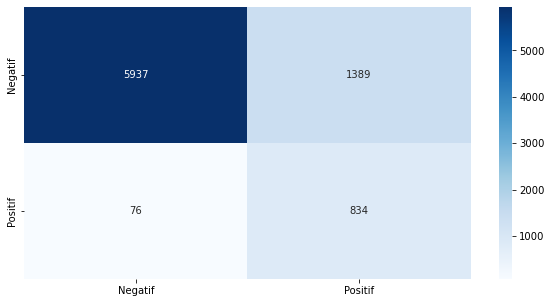

In [673]:
cf_matrix_logreg =  confusion_matrix(y_test,y_pred_test_logreg)

fig,ax = plt.subplots(figsize=(10,5))

ax = sns.heatmap(cf_matrix_logreg, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])

Dapat dilihat model logistic regression ini **goodfit** dan juga menghasilkan akurasi yang lumayan besar.

### VIII.I.II SVM Tuning

In [674]:
svc_grid = GridSearchCV(model_svc, param_grid = parameters_svc, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 'scale'],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='f1')

In [675]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [676]:
svc_grid.best_score_

nan

In [677]:
svc_best= svc_grid.best_estimator_
svc_best

SVC(C=0.1, gamma=1)

In [678]:
y_pred_train_tuning_svc = svc_best.predict(X_train)
y_pred_test_tuning_svc = svc_best.predict(X_test)
print(classification_report(y_train, y_pred_train_tuning_svc))

print(classification_report(y_test, y_pred_test_tuning_svc))

              precision    recall  f1-score   support

          no       0.95      0.99      0.97     28066
         yes       0.73      0.36      0.48      2515

    accuracy                           0.94     30581
   macro avg       0.84      0.67      0.72     30581
weighted avg       0.93      0.94      0.93     30581

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7326
         yes       0.70      0.24      0.35       910

    accuracy                           0.90      8236
   macro avg       0.81      0.61      0.65      8236
weighted avg       0.89      0.90      0.88      8236



[Text(0, 0.5, 'Negatif'), Text(0, 1.5, 'Positif')]

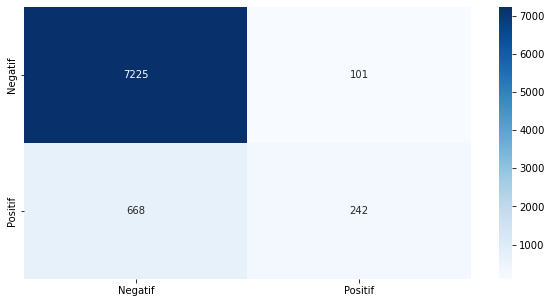

In [679]:
cf_matrix_svc =  confusion_matrix(y_test,y_pred_test_svc)

fig,ax = plt.subplots(figsize=(10,5))

ax = sns.heatmap(cf_matrix_svc, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])

Dapat dilihat model SVC ini **goodfit** dan juga menghasilkan akurasi yang lumayan besar.

### VIII.I.III KNN Tuning

In [680]:
knn_grid = GridSearchCV(model_knn, param_grid = parameters_knn, cv=5, scoring='f1', return_train_score=True, n_jobs=-2)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-2,
             param_grid={'n_neighbors': [1, 5, 10],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='f1')

In [681]:
knn_grid.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [682]:
knn_grid.best_score_

nan

In [683]:
knn_best= knn_grid.best_estimator_
knn_best

KNeighborsClassifier(n_neighbors=1)

In [684]:
y_pred_train_tuning_knn = knn_best.predict(X_train)
y_pred_test_tuning_knn = knn_best.predict(X_test)

print(classification_report(y_train, y_pred_train_tuning_knn))

print(classification_report(y_test, y_pred_test_tuning_knn))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     28066
         yes       0.96      0.95      0.96      2515

    accuracy                           0.99     30581
   macro avg       0.98      0.98      0.98     30581
weighted avg       0.99      0.99      0.99     30581

              precision    recall  f1-score   support

          no       0.93      0.95      0.94      7326
         yes       0.51      0.43      0.46       910

    accuracy                           0.89      8236
   macro avg       0.72      0.69      0.70      8236
weighted avg       0.88      0.89      0.89      8236



[Text(0, 0.5, 'Negatif'), Text(0, 1.5, 'Positif')]

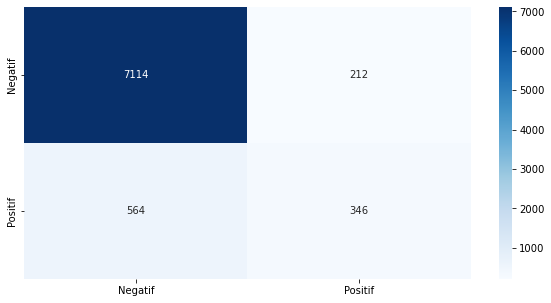

In [685]:
cf_matrix_knn =  confusion_matrix(y_test,y_pred_test_knn)

fig,ax = plt.subplots(figsize=(10,5))

ax = sns.heatmap(cf_matrix_knn, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])

Dapat dilihat model knn ini **overfit** dan juga menghasilkan akurasi yang lumayan besar.

### VIII.I.IV GNB Tuning

In [686]:
gnb_grid = GridSearchCV(model_gnb, param_grid = parameters_gnb, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)
gnb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]},
             return_train_score=True, scoring='f1')

In [687]:
gnb_grid.best_params_

{'var_smoothing': 1e-09}

In [688]:
gnb_grid.best_score_

nan

In [689]:
gnb_best= gnb_grid.best_estimator_
gnb_best

GaussianNB()

In [690]:
y_pred_train_tuning_gnb = gnb_best.predict(X_train)
y_pred_test_tuning_gnb = gnb_best.predict(X_test)

print(classification_report(y_train, y_pred_train_tuning_gnb))

print(classification_report(y_test, y_pred_test_tuning_gnb))

              precision    recall  f1-score   support

          no       0.95      0.90      0.93     28066
         yes       0.32      0.53      0.39      2515

    accuracy                           0.87     30581
   macro avg       0.64      0.71      0.66     30581
weighted avg       0.90      0.87      0.88     30581

              precision    recall  f1-score   support

          no       0.93      0.88      0.91      7326
         yes       0.35      0.50      0.41       910

    accuracy                           0.84      8236
   macro avg       0.64      0.69      0.66      8236
weighted avg       0.87      0.84      0.85      8236



[Text(0, 0.5, 'Negatif'), Text(0, 1.5, 'Positif')]

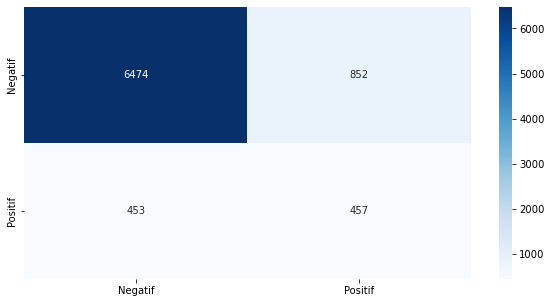

In [691]:
cf_matrix_gnb =  confusion_matrix(y_test,y_pred_test_gnb)

fig,ax = plt.subplots(figsize=(10,5))

ax = sns.heatmap(cf_matrix_gnb, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])

Dapat dilihat model GNB ini **goodfit** dan juga menghasilkan akurasi yang lumayan besar.

#### VIII.I.V Decision Tree Tuning

In [692]:
tree_grid = GridSearchCV(model_tree, param_grid = parameters_tree, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10]),
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10])},
             return_train_score=True, scoring='f1')

In [693]:
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [694]:
tree_grid.best_score_

nan

In [695]:
tree_best= tree_grid.best_estimator_
tree_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=4)

In [696]:
y_pred_train_tuning_tree = tree_best.predict(X_train)
y_pred_test_tuning_tree = tree_best.predict(X_test)
print(classification_report(y_train, y_pred_train_tuning_tree))

print(classification_report(y_test, y_pred_test_tuning_tree))

              precision    recall  f1-score   support

          no       0.96      0.97      0.96     28066
         yes       0.58      0.54      0.56      2515

    accuracy                           0.93     30581
   macro avg       0.77      0.75      0.76     30581
weighted avg       0.93      0.93      0.93     30581

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7326
         yes       0.62      0.43      0.51       910

    accuracy                           0.91      8236
   macro avg       0.78      0.70      0.73      8236
weighted avg       0.90      0.91      0.90      8236



[Text(0, 0.5, 'Negatif'), Text(0, 1.5, 'Positif')]

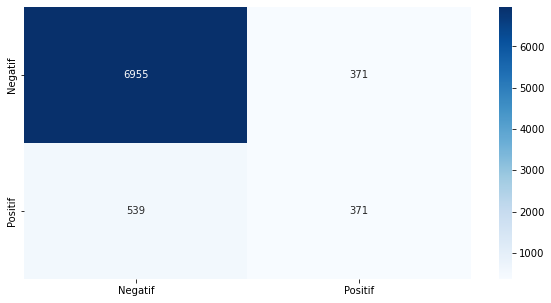

In [697]:
cf_matrix_tree =  confusion_matrix(y_test,y_pred_test_tree)

fig,ax = plt.subplots(figsize=(10,5))

ax = sns.heatmap(cf_matrix_tree, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])

Dapat dilihat model Decision Tree ini **goodfit** dan juga menghasilkan akurasi yang sangat besar.

#### VIII.I.VI Random Forest Tuning

In [698]:
rf_grid = GridSearchCV(model_rf, param_grid = parameters_rf, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)
rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
rf_grid.best_score_

nan

In [ ]:
rf_best= rf_grid.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=4)

In [ ]:
y_pred_train_tuning_rf = rf_best.predict(X_train)
y_pred_test_tuning_rf = rf_best.predict(X_test)
print(classification_report(y_train, y_pred_train_tuning_rf))

print(classification_report(y_test, y_pred_test_tuning_rf))

              precision    recall  f1-score   support

          no       0.93      1.00      0.96     28066
         yes       0.80      0.20      0.32      2515

    accuracy                           0.93     30581
   macro avg       0.87      0.60      0.64     30581
weighted avg       0.92      0.93      0.91     30581

              precision    recall  f1-score   support

          no       0.90      1.00      0.95      7326
         yes       0.80      0.15      0.25       910

    accuracy                           0.90      8236
   macro avg       0.85      0.57      0.60      8236
weighted avg       0.89      0.90      0.87      8236



[Text(0, 0.5, 'Negatif'), Text(0, 1.5, 'Positif')]

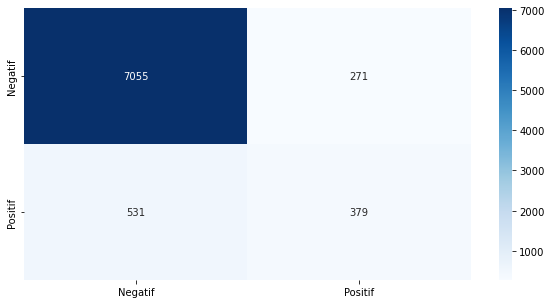

In [ ]:
cf_matrix_rf =  confusion_matrix(y_test,y_pred_test_rf)

fig,ax = plt.subplots(figsize=(10,5))

ax = sns.heatmap(cf_matrix_rf, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])

Dapat dilihat model Random Forest ini **goodfit** dan juga menghasilkan akurasi yang sangat besar.

### VIII.I.VII XGBoost Tuning

In [ ]:
xgb_grid = GridSearchCV(model_xgb, param_grid = parameters_xgb, cv=5,scoring='f1',return_train_score=True, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

[20:13:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
          

In [ ]:
xgb_grid.best_params_

{'gamma': 2, 'max_depth': 2, 'min_child_weight': 2}

In [ ]:
xgb_grid.best_score_

nan

In [ ]:
xgb_best = xgb_grid.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred_train_tuning_xgb = xgb_best.predict(X_train)
y_pred_test_tuning_xgb = xgb_best.predict(X_test)
print(classification_report(y_train, y_pred_train_tuning_xgb))

print(classification_report(y_test, y_pred_test_tuning_xgb))

              precision    recall  f1-score   support

          no       0.95      0.98      0.97     28066
         yes       0.70      0.46      0.56      2515

    accuracy                           0.94     30581
   macro avg       0.83      0.72      0.76     30581
weighted avg       0.93      0.94      0.93     30581

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      7326
         yes       0.69      0.39      0.50       910

    accuracy                           0.91      8236
   macro avg       0.81      0.68      0.72      8236
weighted avg       0.90      0.91      0.90      8236



[Text(0, 0.5, 'Negatif'), Text(0, 1.5, 'Positif')]

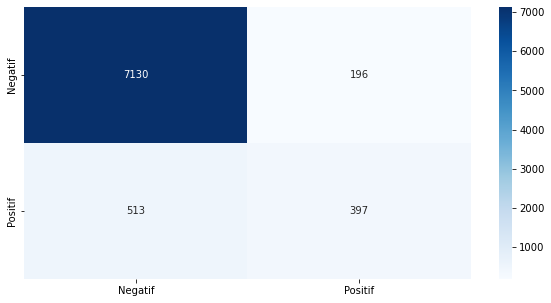

In [ ]:
cf_matrix_xgb =  confusion_matrix(y_test,y_pred_test_xgb)

fig,ax = plt.subplots(figsize=(10,5))

ax = sns.heatmap(cf_matrix_xgb, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])

Dapat dilihat model XGB ini **goodfit** dan juga menghasilkan akurasi yang sangat besar.

# IX. Model Inference
> Pada bagian ini tiap model akan diuji dengan menggunakan **10 data inference** yang sudah dipisahkan dari data training dan testing.

In [ ]:
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,24,admin.,single,university.degree,no,no,no,cellular,aug,fri,...,1,6.0,2,failure,-1.7,94.027,-38.3,0.905,4991.6,yes
1,32,services,married,high.school,no,yes,yes,cellular,apr,mon,...,6,6.0,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
2,45,unknown,married,unknown,no,no,no,telephone,jun,fri,...,4,6.0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
3,53,technician,married,professional.course,unknown,no,no,telephone,may,wed,...,2,6.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,53,management,married,basic.4y,no,yes,no,cellular,nov,wed,...,7,6.0,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
5,39,technician,married,unknown,no,yes,yes,cellular,may,fri,...,1,6.0,1,failure,-1.8,92.893,-46.2,1.250,5099.1,no
6,54,technician,single,university.degree,unknown,no,no,telephone,jun,thu,...,3,6.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
7,39,admin.,married,university.degree,no,yes,no,cellular,jul,mon,...,4,6.0,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
8,55,management,married,university.degree,no,yes,no,telephone,jun,mon,...,5,6.0,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
9,35,admin.,married,university.degree,no,yes,yes,telephone,may,mon,...,3,6.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## IX.I Inference Preprocessing

In [ ]:
# Split Numerical and Categorical Columns

df_inf_num = df_inf[num_cols]
df_inf_cat = df_inf[cat_cols]

# Feature Scaling and Feature Encoding

df_inf_num_scaled = scaler.transform(df_inf_num)
df_inf_cat_encoded = encoder.transform(df_inf_cat)

# Concatenation

df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded.toarray()], axis=1)
df_inf_final

array([[ 3.81823672e+00,  2.66936635e-03, -1.13260306e+00,
        -1.56727785e+00, -2.43361099e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.39617857e+00,  2.66936635e-03, -1.19620123e+00,
        -1.27890000e+00, -9.42936426e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.00757038e+00,  2.66936635e-03,  8.38940120e-01,
         7.70889750e-01,  8.45873054e-01,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 4.66610912e+00,  2.66936635e-03,  6.48145619e-01,
         7.12060669e-01,  3.31416994e-01,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [-9.86373571e-01,  2.66936635e-03, -1.15032387e-01,
         2.86991719e-01,  3.97977347e-01,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [-2.30354011e-01,  2.66936635e-03, -1.19620123e+00,
        -1.36829713e+00, -9.42936426e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.75839621e+00,  2.669366

## IX.II. Prediction

### Decision Tree

In [ ]:
y_pred_inf_tree = model_tree.predict(df_inf_final)
y_pred_inf_tree = pd.DataFrame(y_pred_inf_tree, columns=['y Prediction'])
y_pred_inf_tree

,y Prediction
0,yes
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


In [ ]:
pd.concat([df_inf.reset_index(drop=True), y_pred_inf_tree], axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y Prediction
0,24,admin.,single,university.degree,no,no,no,cellular,aug,fri,...,6.0,2,failure,-1.7,94.027,-38.3,0.905,4991.6,yes,yes
1,32,services,married,high.school,no,yes,yes,cellular,apr,mon,...,6.0,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no,no
2,45,unknown,married,unknown,no,no,no,telephone,jun,fri,...,6.0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,no
3,53,technician,married,professional.course,unknown,no,no,telephone,may,wed,...,6.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,no
4,53,management,married,basic.4y,no,yes,no,cellular,nov,wed,...,6.0,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no,no
5,39,technician,married,unknown,no,yes,yes,cellular,may,fri,...,6.0,1,failure,-1.8,92.893,-46.2,1.250,5099.1,no,no
6,54,technician,single,university.degree,unknown,no,no,telephone,jun,thu,...,6.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no,no
7,39,admin.,married,university.degree,no,yes,no,cellular,jul,mon,...,6.0,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,no
8,55,management,married,university.degree,no,yes,no,telephone,jun,mon,...,6.0,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no,no
9,35,admin.,married,university.degree,no,yes,yes,telephone,may,mon,...,6.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no


In [ ]:
print(classification_report(df_inf['y'], y_pred_inf_tree))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94         8
         yes       1.00      0.50      0.67         2

    accuracy                           0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10



# X. Pengambilan Kesimpulan

Kesimpulan yang dapat ditarik dari hasil EDA :

Dataset ini mencatat hasi kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y). Dari korelasi data dengan target, ditemukan 6 atribut yang paling memengaruhi target, 5 diantaranya tergolong numerik(`duration`, `pdays`, `emp.var.rate`, `euribor3m`, `nr.employed`) dan 1 tergolong kategorikal(`poutcome`).Diketahui mayoritas klien yang berlangganan deposito berjangka memiliki durasi kontak terakhir apabila dibandingkan dengan yang tidak berlangganan, memilki jenis pekerjaan sebagai admin, lebih menggunakan ponsel sebagai alat komunikasi, tidak memiliki pinjaman pribadi namun lebih cenderung memiliki pinjaman perumahan. Dalam poutcome, Diketahui outcome yang paling banyak muncul bagi klien yang berlangganan maupun yang tidak berlangganan deposito berjangka yaitu outcome 'nonexistent'. Namun outcome sukses lebih banyak memiliki jumlah klien yang berlangganan dibandingkan dengan yang tidak berlangganan.

Dari hasil pembuatan model dapat diambil kesimpulan sebagai berikut:

Dikarenakan model **Decision Tree**, dengan menggunakan **6 features** yaitu `duration`, `pdays`, `emp.var.rate`, `euribor3m`, `nr.employed`, dan `poutcome` menghasilkan model dengan **akurasi yang tinggi** yaitu 0.93 pada **Train Set**, 0.91 pada **Test Set**, dan 0.90 pada **Prediction** berdasarkan data inference. Setelah melalui fase tuning, Model **Decision Tree** juga termasuk **goodfit**, dan memiliki gap terkecil antara Train Set & Test Set apabila dibandingkan model Logistic Regression, Support vector machine, k-nearest neighbors, Gaussian Naive Bayes, Random Forest, dan XGBoost.